<a href="https://colab.research.google.com/github/humanluz/github-slideshow/blob/master/Encuentro_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **MeTCaMPDatos**


**Edición 2021 - Encuentro 3**

<img src="https://i.imgur.com/HnKHks1.png" height="150" />


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Importar dataset

In [ ]:
url = 'https://raw.githubusercontent.com/MeT2021/MeTCamp-Data-Science/main/Encuentro3/sysarmy_2020_clear.csv'
df_1 = pd.read_csv(url)

In [ ]:
df_1.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_pais', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios', 'perfil_carrera',
       'perfil_universidad', 'perfil_cursos_especializacion',
       'perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anteri

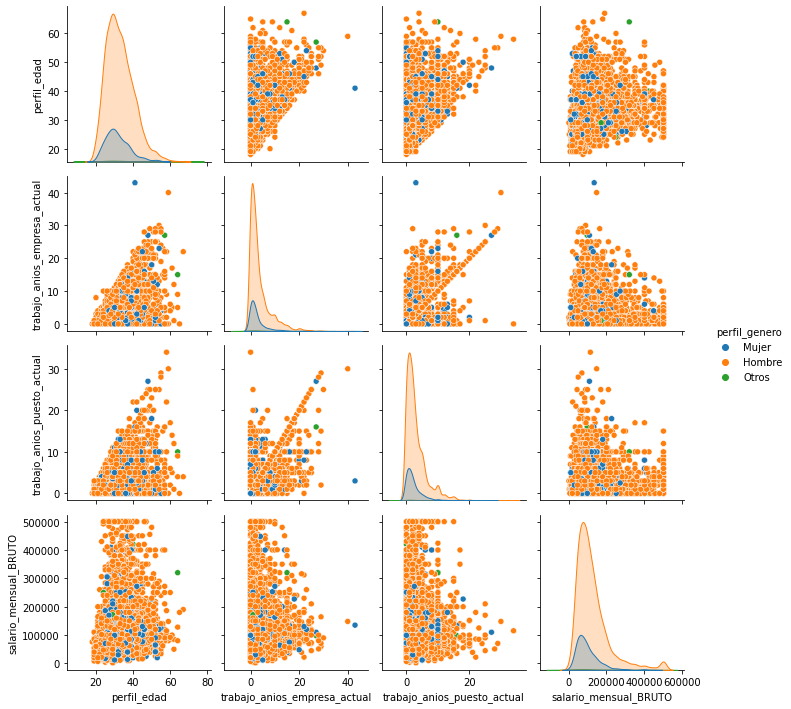

In [ ]:
sns.pairplot(df_1[['perfil_edad', 'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       #'trabajo_personas_a_cargo', 'salario_guardias_pago', 
       'salario_mensual_BRUTO', #'salario_mensual_NETO',
       'perfil_genero']],
      hue = 'perfil_genero')

In [ ]:
df.shape

(6044, 48)

## Creación del target

Recordemos que el TARGET es nuestra variable a predecir. 
En este caso vamos a CONSTRUIR nuestro propio target para poder practicar machine learning.

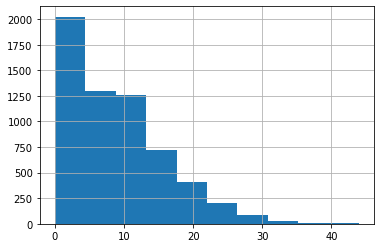

In [ ]:
## vemos el campo perfil_anos_experiencia
df['perfil_anos_experiencia'].hist();

In [ ]:
## creamos nuestro target 

## personas que tengan menos de dos años de experiencia
df.loc[df['perfil_anos_experiencia'] <= 2, 'experiencia_menor2'] = 1

## personas que tengan más de dos años de experiencia
df.loc[df['perfil_anos_experiencia'] > 2, 'experiencia_menor2'] = 0

In [ ]:
## vemos como quedó nuestra variable target
df['experiencia_menor2']

0       0.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
6039    0.0
6040    0.0
6041    1.0
6042    0.0
6043    0.0
Name: experiencia_menor2, Length: 6044, dtype: float64

Ahora vamos a suponer que nuestro dataset se constituye por todas las variables que venimos trabajando pero ahora reemplazamos perfil_anos_experiencia por experiencia_menor2. 

Y nos vamos a hacer la pregunta:

 ### ¿Podemos predecir que personas tienen menos de 2 años de experiencia laboral? 

In [ ]:
# distribución del target 
df['experiencia_menor2'].value_counts()

0.0    4888
1.0    1156
Name: experiencia_menor2, dtype: int64

## Selección de variables







<center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJa9pmi6qErrLgApyoFiMdi1oAqdmv-19Q9y0vGlTC358fYKzGeUckSQ2opBCPwU2NJPkm3o2YTWXgvw&usqp=CAU" height="170" />
</center>

El primer paso en cualquier problema de clasificación es:
- Pensar que variables pueden tener relación con nuestra variable a predecir. 

Es clave que hayan patrones entre nuestras variables seleccionadas y el target. Sin patrones el modelo no podrá aprender. 

In [ ]:
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_pais', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios', 'perfil_carrera',
       'perfil_universidad', 'perfil_cursos_especializacion',
       'perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma',
       'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 'trabajo_guardias ',
       'salario_guardias_pago', 'trabajo_guardias_tipo_pago ',
       'trabajo_tipo_contrato', 'salario_mensual_BRUTO',
       'salario_mensual_NETO', 'salario_salario_dolares',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anteri

In [ ]:
df.trabajo_pais.unique()

array(['Argentina'], dtype=object)

In [ ]:
#son todos de arg
df = df.drop('trabajo_pais',axis=1)

Eliminamos las columnas que creemos NO estarán relacionadas a nuestro target

In [ ]:
df = df.drop(['perfil_contribuciones_open_source', 'perfil_programa_como_hobbie',
       'trabajo_rol', 'herramientas_plataforma', 'perfil_cursos_especializacion',
        'herramientas_languagjs_programacion', 'herramientas_frameworks',
       'herramientas_data_bases', 'herramientas_qa_testing',
       'herramientas_IDEs', 'herramientas_sistema_operativo_pc',
       'herramientas_sistema_operativo_cel', 
       'trabajo_guardias_tipo_pago ',
       'salario_conformidad_sueldo',
       'salario_comparacion_sueldo_semestre_anterior ', 'salario_bonos',
       'salario_bono_atado_a ', 'salario_ajustes_inflacion_2020 ',
       'salario_porcentaje_inflacion_ajuste_2020',
       'salario_mes_ultimo_ajuste_inflacion ', 'trabajo_violencia_laboral',
       'perfil_orientacion_sexual', 'perfil_discapacidad',
       'perfil_dificultad_ser_contratada_discapacidad', 'perfil_carrera', 'perfil_universidad',
       'compania_cantidad_empleadxs', 'compania_actividad_princiapl',
       'compania_recomendacion_lugar_trabajo', 'compania_politicas_inclusion',
       'compania_beneficios_extra', 'compania_mejor_compania_ciudad',
       'trabajo_guardias ','salario_mensual_NETO'
      ], axis=1)

In [ ]:
df.columns

Index(['perfil_genero', 'perfil_edad', 'trabajo_provincia',
       'perfil_anos_experiencia', 'trabajo_anios_empresa_actual',
       'trabajo_anios_puesto_actual', 'trabajo_personas_a_cargo',
       'perfil_nivel_estudios', 'perfil_estado_estudios',
       'salario_guardias_pago', 'trabajo_tipo_contrato',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2'],
      dtype='object')

In [ ]:
df.head()

,perfil_genero,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2
0,Mujer,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,Full_time,53000.0,NaN,0.0
1,Hombre,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,Full_time,79000.0,NaN,0.0
2,Mujer,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,Full_time,160000.0,NaN,1.0
3,Hombre,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,Full_time,130000.0,NaN,0.0
4,Hombre,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,Full_time,140000.0,NaN,0.0


## Preprocesar columnas

### Codificación de variables categóricas

**One Hot Encoding**

<img src="https://etlpoint.com/wp-content/uploads/2020/07/77.png" height="250" />

1. Importar libreria de sklearn

In [ ]:
df.head()

,perfil_genero,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,trabajo_tipo_contrato,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2
0,Mujer,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,Full_time,53000.0,NaN,0.0
1,Hombre,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,Full_time,79000.0,NaN,0.0
2,Mujer,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,Full_time,160000.0,NaN,1.0
3,Hombre,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,Full_time,130000.0,NaN,0.0
4,Hombre,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,Full_time,140000.0,NaN,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

2.  Crear un objeto del tipo OneHotEncoder

In [ ]:
onehot_encoder = OneHotEncoder()

3. Usar el metodo fit_transform para codificar la columna trabajo_tipo_contrato del dataset 

In [ ]:
df['trabajo_tipo_contrato'].unique()

array(['Full_time', 'Freelance', 'Part_time', 'Tercerizado',
       'Remoto_para_otro_pais'], dtype=object)

In [ ]:
onehot_encoder.fit_transform(df[['trabajo_tipo_contrato']]).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
tipo_contrato_codigo=onehot_encoder.fit_transform(df[['trabajo_tipo_contrato']]).toarray()

In [ ]:
tipo_contrato_codigo

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
onehot_encoder.categories_[0]

array(['Freelance', 'Full_time', 'Part_time', 'Remoto_para_otro_pais',
       'Tercerizado'], dtype=object)

In [ ]:
tipo_contrato_codigo=pd.DataFrame(tipo_contrato_codigo, columns=onehot_encoder.categories_[0])

In [ ]:
tipo_contrato_codigo.head()

,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0


4. Pegar los datos codificados al dataset original

In [ ]:
df=df.join(tipo_contrato_codigo)

In [ ]:
df = df.drop(['trabajo_tipo_contrato'],axis=1)

In [ ]:
df.head()

,perfil_genero,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado
0,Mujer,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,53000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1,Hombre,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,79000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
2,Mujer,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,160000.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0
3,Hombre,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,130000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
4,Hombre,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,140000.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0


**Columna: Salario Dolares**

También puede haber columnas donde esté "implícito" que requieren una codificación como:

In [ ]:
df.salario_salario_dolares.unique()

array([nan, 'Mi sueldo está dolarizado'], dtype=object)

In [ ]:
df['salario_salario_dolares']=df.salario_salario_dolares.replace('Mi sueldo está dolarizado', 1)

In [ ]:
df.salario_salario_dolares.fillna(0, inplace=True)

In [ ]:
df['salario_salario_dolares']=df['salario_salario_dolares'].astype(int)

In [ ]:
df.salario_salario_dolares.value_counts()

0    5395
1     649
Name: salario_salario_dolares, dtype: int64

**Ordinal Encoding**

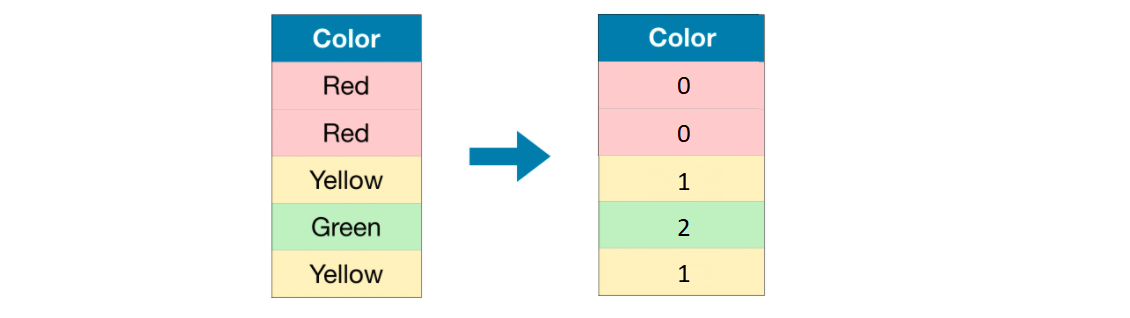


1. Importar la libreria

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

2. Crear un objeto del tipo LabelEncoder

In [ ]:
ordinal_encoder= OrdinalEncoder()

3. Usar el metodo fit_transform para codificar la columna perfil_genero del dataset 

In [ ]:
df['perfil_genero'].unique()

array(['Mujer', 'Hombre', 'Otros'], dtype=object)

In [ ]:
ordinal_encoder.fit_transform(df[['perfil_genero']])

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

4. Pegar los datos codificados al dataset original

In [ ]:
df['perfil_genero_codigo']=ordinal_encoder.fit_transform(df[['perfil_genero']])

In [ ]:
df = df.drop(['perfil_genero'], axis=1)

In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


También existen columnas que si bien aplicaría un LabelEncoder como el nivel de estudios y el estado de los estudios. Como la compu no puede saber cual es el orden correcto (lo hace alfabéticamente) lo haremos de forma manual con la función MAP

**Función map**

<img src="https://swiftunboxed.com/images/map.png" height="250" />






In [ ]:
df['perfil_nivel_estudios'].unique()

array(['Universitario', 'Secundario', 'Posgrado', 'Terciario',
       'Doctorado', 'Posdoctorado', 'Primario'], dtype=object)

In [ ]:
df['perfil_nivel_estudios'].map({'Primario':1,
                                  'Secundario':2, 
                                   'Terciario':3,
                                   'Universitario':4,
                                    'Doctorado':5, 
                                    'Posgrado':6, 
                                    'Posdoctorado':6, 
                                    })

0       4
1       4
2       2
3       6
4       4
       ..
6039    3
6040    4
6041    3
6042    3
6043    3
Name: perfil_nivel_estudios, Length: 6044, dtype: int64

In [ ]:
df['perfil_nivel_estudios'] = df['perfil_nivel_estudios'].map({'Primario':1,
                                                               'Secundario':2, 
                                                               'Terciario':3,
                                                               'Universitario':4,
                                                               'Doctorado':5, 
                                                               'Posgrado':6, 
                                                                'Posdoctorado':6, 
                                                                })

In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,4,En curso,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,4,En curso,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,2,Completado,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,6,Incompleto,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,4,En curso,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


*Ejercicio:* Hacer una función map para la columna: perfil_estado_estudios

In [ ]:
## Listar todos los valores de la columna


df['perfil_estado_estudios'] = df['perfil_estado_estudios'].map({'En curso':0, 'Completado' : 1, 'Incompleto' : 2,}) 

In [ ]:
## Asignar 0: Incompleto, 1: En curso, 2: Completado 




In [ ]:
df.head()

,perfil_edad,trabajo_provincia,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo
0,26,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,4,0,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,Corrientes,5.0,2.0,2.0,4,4,0,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,2,1,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,Corrientes,15.0,15.0,13.0,5,6,2,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,4,0,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


También cabe considerar que no todas las columnas deben ser codificadas. Por ejemplo:

Esta columna aunque tiene info tal vez relevante agregaría demasiadas dimensiones a nuestro dataset de pocas filas... La relación entre # columnas y # filas es clave

In [ ]:
df['trabajo_provincia'].unique()

array(['Ciudad Autónoma de Buenos Aires', 'Corrientes',
       'Provincia de Buenos Aires', 'Entre Ríos', 'Córdoba', 'Tucumán',
       'GBA', 'Santa Fe', 'Neuquén', 'Mendoza', 'Misiones', 'Chaco',
       'Chubut', 'Jujuy', 'La Rioja', 'Río Negro', 'Salta',
       'Tierra del Fuego', 'San Luis', 'Catamarca', 'San Juan',
       'Santiago del Estero', 'La Pampa', 'Formosa', 'Santa Cruz'],
      dtype=object)

In [ ]:
df.drop(['trabajo_provincia'],
        axis=1, inplace=True )

In [ ]:
df.columns

Index(['perfil_edad', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'salario_guardias_pago',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2', 'Freelance', 'Full_time', 'Part_time',
       'Remoto_para_otro_pais', 'Tercerizado', 'perfil_genero_codigo'],
      dtype='object')

In [ ]:
df.head()

,perfil_edad,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo
0,26,3.0,3.0,3.0,0,4,0,0.0,53000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,29,5.0,2.0,2.0,4,4,0,0.0,79000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,22,2.0,0.0,0.0,0,2,1,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,39,15.0,15.0,13.0,5,6,2,0.0,130000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,32,9.0,6.0,6.0,0,4,0,0.0,140000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Otras transformaciones

Objetivo: Crear nuevas variables adaptadas al negocio concreto y que aporten  valor  para su inclusión en los modelos que desarrollaremos posteriormente. Estas nuevas variables (columnas) surgen de operaciones aplicadas a los datos que ya poseemos.


- Proporcion de tiempo trabajando en el puesto actual sobre la cantidad de años trabajando en la empresa 
(trabajo_anios_puesto_actual/trabajo_anios_empresa_actual)


In [ ]:
df['proporcion_puesto_actual']= df['trabajo_anios_puesto_actual'] / (df['trabajo_anios_empresa_actual'])

¿Qué paso con la division por cero?

In [ ]:
df[df.trabajo_anios_empresa_actual==0].head()

,perfil_edad,perfil_anos_experiencia,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,experiencia_menor2,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo,proporcion_puesto_actual
2,22,2.0,0.0,0.0,0,2,1,0.0,160000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
5,25,1.0,0.0,0.0,0,3,2,0.0,54000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
7,23,0.0,0.0,0.0,0,3,0,0.0,45000.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
10,25,1.0,0.0,0.0,0,3,0,0.0,36800.0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
14,42,10.0,0.0,0.0,3,4,2,0.0,102000.0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN


Para evitar dicho error, podemos filtrar nuestro dataset antes de hacer el cálculo

In [ ]:
df.loc[df['trabajo_anios_empresa_actual']>0, 'proporcion_puesto_actual']=  df['trabajo_anios_puesto_actual'] / (df['trabajo_anios_empresa_actual'])
df.loc[df['trabajo_anios_empresa_actual']==0, 'proporcion_puesto_actual']= 1

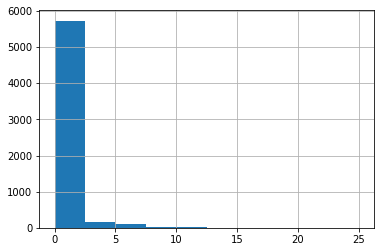

In [ ]:
df['proporcion_puesto_actual'].hist(bins=10)


- Porcentaje de precio de guardias sobre el salario bruto

In [ ]:
df['proporcion_precio_guardia']= df['salario_guardias_pago'] / (df['salario_mensual_BRUTO'])

In [ ]:
df['proporcion_precio_guardia'].describe()

count    6044.000000
mean        0.005723
std         0.057479
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.904762
Name: proporcion_precio_guardia, dtype: float64

- ¿Qué otras transformaciones podriamos hacer?


## Variables contra el target

Un paso clave en todo proyecto de aprendizaje supervisado, es no solo la visualización en el framework del EDA si no también para ver la relación de nuestras variables contra nuestro TARGET.
De nuevo: sin patrones el modelo no va a tener que aprender. 

In [ ]:
df.columns

Index(['perfil_edad', 'perfil_anos_experiencia',
       'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       'trabajo_personas_a_cargo', 'perfil_nivel_estudios',
       'perfil_estado_estudios', 'salario_guardias_pago',
       'salario_mensual_BRUTO', 'salario_salario_dolares',
       'experiencia_menor2', 'Freelance', 'Full_time', 'Part_time',
       'Remoto_para_otro_pais', 'Tercerizado', 'perfil_genero_codigo',
       'proporcion_puesto_actual', 'proporcion_precio_guardia'],
      dtype='object')

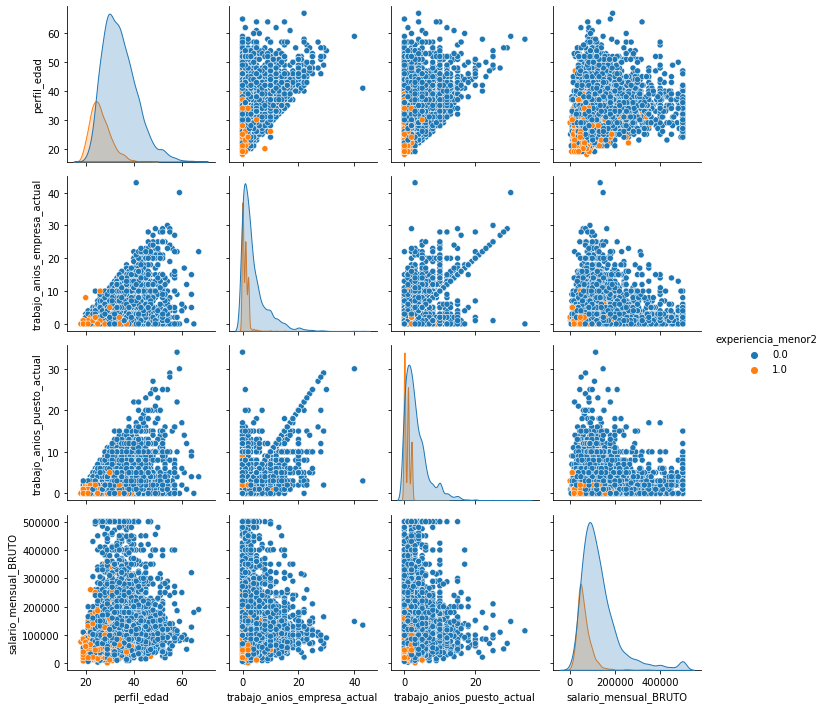

In [ ]:
sns.pairplot(df[['perfil_edad', 'trabajo_anios_empresa_actual', 'trabajo_anios_puesto_actual',
       #'trabajo_personas_a_cargo', 'salario_guardias_pago', 
       'salario_mensual_BRUTO', #'salario_mensual_NETO',
       'experiencia_menor2']],
      hue = 'experiencia_menor2')

In [ ]:
## Ejercicio: Hacer un pairplot con otras variables

## Modelo de clasificación


*En los problemas de clasificación, la variable que queremos predecir es una clase discreta.*

In [ ]:
df.dtypes

perfil_edad                       int64
perfil_anos_experiencia         float64
trabajo_anios_empresa_actual    float64
trabajo_anios_puesto_actual     float64
trabajo_personas_a_cargo          int64
perfil_nivel_estudios             int64
perfil_estado_estudios            int64
salario_guardias_pago           float64
salario_mensual_BRUTO           float64
salario_salario_dolares           int64
experiencia_menor2              float64
Freelance                       float64
Full_time                       float64
Part_time                       float64
Remoto_para_otro_pais           float64
Tercerizado                     float64
perfil_genero_codigo            float64
proporcion_puesto_actual        float64
proporcion_precio_guardia       float64
dtype: object

In [ ]:
df.isna().sum()

perfil_edad                     0
perfil_anos_experiencia         0
trabajo_anios_empresa_actual    0
trabajo_anios_puesto_actual     0
trabajo_personas_a_cargo        0
perfil_nivel_estudios           0
perfil_estado_estudios          0
salario_guardias_pago           0
salario_mensual_BRUTO           0
salario_salario_dolares         0
experiencia_menor2              0
Freelance                       0
Full_time                       0
Part_time                       0
Remoto_para_otro_pais           0
Tercerizado                     0
perfil_genero_codigo            0
proporcion_puesto_actual        0
proporcion_precio_guardia       0
dtype: int64

In [ ]:
df.shape

(6044, 19)

1.  Definir las variables de entradas para el modelo y La columna target.


In [ ]:
X = df.drop(['perfil_anos_experiencia', 'experiencia_menor2'],axis=1)
y = df['experiencia_menor2']

2. Dividir en set de entrenamiento y set de prueba

<center>
<img src="https://www.dataquest.io/wp-content/uploads/kaggle_overview.svg" height="400" />

<center>
<img src="https://www.dataquest.io/wp-content/uploads/kaggle_train_test_split.svg" height="300" />


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311)

In [ ]:
print('Dimensiones del set de entrenamiento', X_train.shape)
print('Dimensiones del set de testing', X_test.shape)

Dimensiones del set de entrenamiento (4835, 17)
Dimensiones del set de testing (1209, 17)


3. Crear un objeto que tenga el tipo de modelo que queremos entrenar



 https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_leaf_nodes=2, random_state=0)

4. Entrenar el modelo

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=2,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

5. Predecir

In [ ]:
pred_y = clf.predict(X_test)

In [ ]:
pred_y

array([1., 1., 0., ..., 0., 0., 0.])

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', pred_y[:5])

Real      :  [1. 1. 1. 0. 0.]
Prediccion:  [1. 1. 0. 0. 0.]


In [ ]:
X_train.head()

,perfil_edad,trabajo_anios_empresa_actual,trabajo_anios_puesto_actual,trabajo_personas_a_cargo,perfil_nivel_estudios,perfil_estado_estudios,salario_guardias_pago,salario_mensual_BRUTO,salario_salario_dolares,Freelance,Full_time,Part_time,Remoto_para_otro_pais,Tercerizado,perfil_genero_codigo,proporcion_puesto_actual,proporcion_precio_guardia
3318,29,4.0,4.0,0,4,0,0.0,41500.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3574,39,2.0,14.0,0,5,0,0.0,130000.0,0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,0.0
3386,26,0.0,0.0,0,4,1,0.0,70000.0,1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4323,23,0.0,2.0,0,4,0,0.0,90000.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3409,38,3.0,3.0,0,4,1,0.0,85000.0,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_train.iloc[:,0]

3318    29
3574    39
3386    26
4323    23
3409    38
        ..
3384    23
998     30
5213    41
2752    45
4004    28
Name: perfil_edad, Length: 4835, dtype: int64

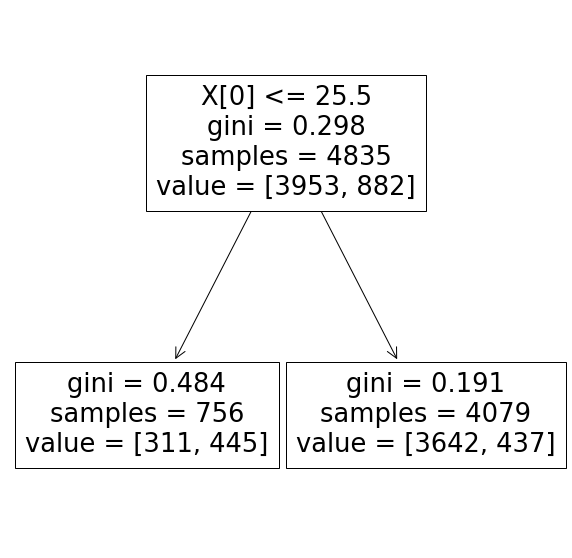

In [ ]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf)
plt.show()

Métodos un poco más complejos...

## Modelo de Regresion 

*En los problemas de regresión, la variable que queremos predecir (target) es un número continuo.*

1. Definir entradas para el modelo y la columna target

In [ ]:
y = df['perfil_anos_experiencia']
X = df.drop(['perfil_anos_experiencia','experiencia_menor2'], axis=1)

2. Dividir en set de entrenamiento y set de prueba

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311)

In [ ]:
print('Dimensiones del set de entrenamiento', X_train.shape)
print('Dimensiones del set de testing', X_test.shape)

Dimensiones del set de entrenamiento (4835, 14)
Dimensiones del set de testing (1209, 14)


3. Crear un objeto que tenga el tipo de modelo que queremos entrenar

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

4. Entrenar el modelo

In [ ]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5. Predecir

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
print('Real      : ', y_test[:5].values)
print('Prediccion: ', y_pred[:5])

Real      :  [1. 2. 2. 3. 7.]
Prediccion:  [1.94251439 1.99377887 3.96446274 5.93911238 7.3070428 ]


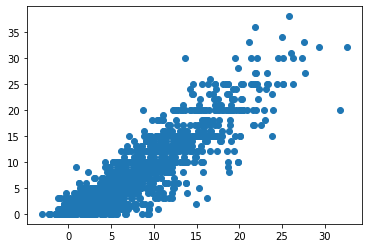

In [ ]:
plt.scatter(x=y_pred, 
           y=y_test);

## A practicar otros modelos!

**Modelos de Clasificación**

- Random Forest Classifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

- KNN 
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



**Modelos de Regresión**


- Decision Tree Regressor https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

- Random Forest Regressor 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


